In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print(f"Training: {train_df.shape}, Test: {test_df.shape}")

Training: (101240, 22), Test: (108241, 21)


In [ ]:
import pandas as pd

dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
traindata = pd.read_csv(dataset_url)

print("\nDataset Overview:")
print(traindata.describe())
print(f"Missing values: {traindata.isnull().sum().sum()}")

# Prepare features and target
features = [col for col in traindata.columns if col not in ['id', 'FloodProbability']]
X = traindata[features]
y = traindata['FloodProbability']
print(f"Features: {len(features)}, Target range: [{y.min():.3f}, {y.max():.3f}]")


Dataset Overview:
                 id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
count  1.117957e+06      1.117957e+06        1.117957e+06     1.117957e+06   
mean   5.589780e+05      4.921450e+00        4.926671e+00     4.955322e+00   
std    3.227265e+05      2.056387e+00        2.093879e+00     2.072186e+00   
min    0.000000e+00      0.000000e+00        0.000000e+00     0.000000e+00   
25%    2.794890e+05      3.000000e+00        3.000000e+00     4.000000e+00   
50%    5.589780e+05      5.000000e+00        5.000000e+00     5.000000e+00   
75%    8.384670e+05      6.000000e+00        6.000000e+00     6.000000e+00   
max    1.117956e+06      1.600000e+01        1.800000e+01     1.600000e+01   

       Deforestation  Urbanization  ClimateChange   DamsQuality     Siltation  \
count   1.117957e+06  1.117957e+06   1.117957e+06  1.117957e+06  1.117957e+06   
mean    4.942240e+00  4.942517e+00   4.934093e+00  4.955878e+00  4.927791e+00   
std     2.051689e+00  2.083391e+00 

Visuals

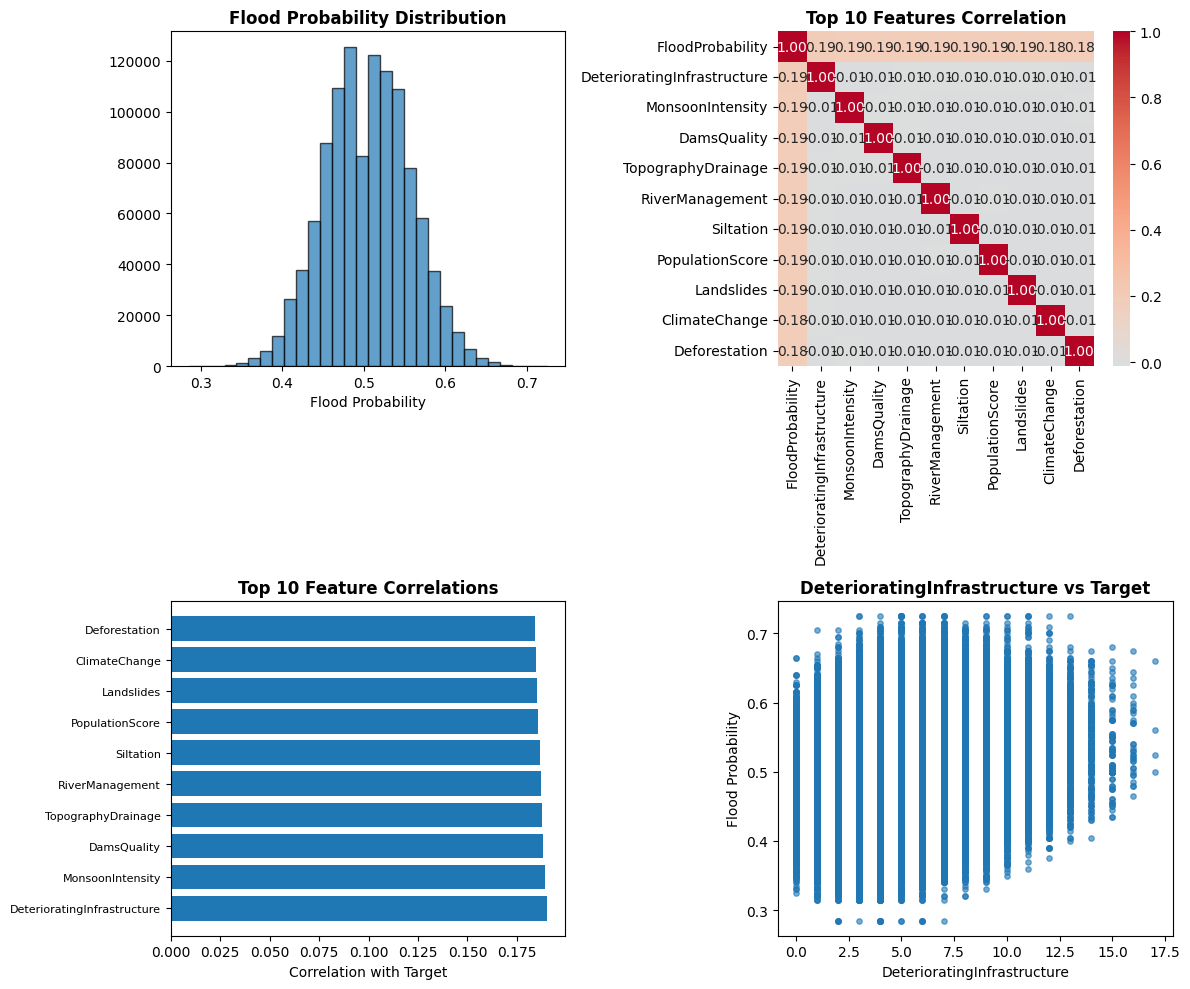

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Target distribution
axes[0,0].hist(y, bins=30, alpha=0.7, edgecolor='black')
axes[0,0].set_title('Flood Probability Distribution', fontweight='bold')
axes[0,0].set_xlabel('Flood Probability')

# Correlation heatmap (top features)
corr_matrix = traindata[features + ['FloodProbability']].corr()
target_corr = corr_matrix['FloodProbability'].abs().sort_values(ascending=False)
top_10_features = target_corr.head(11).index
sns.heatmap(traindata[top_10_features].corr(), annot=True, cmap='coolwarm',
            center=0, ax=axes[0,1], fmt='.2f')
axes[0,1].set_title('Top 10 Features Correlation', fontweight='bold')

# Feature importance
top_corr = target_corr[1:11]  # Exclude self-correlation
axes[1,0].barh(range(len(top_corr)), top_corr.values)
axes[1,0].set_yticks(range(len(top_corr)))
axes[1,0].set_yticklabels(top_corr.index, fontsize=8)
axes[1,0].set_title('Top 10 Feature Correlations', fontweight='bold')
axes[1,0].set_xlabel('Correlation with Target')

# Best feature scatter
best_feature = target_corr.index[1]
axes[1,1].scatter(traindata[best_feature], y, alpha=0.6, s=15)
axes[1,1].set_xlabel(best_feature)
axes[1,1].set_ylabel('Flood Probability')
axes[1,1].set_title(f'{best_feature} vs Target', fontweight='bold')

plt.tight_layout()
plt.show()

Model

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Load training data and define X and y
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
traindata = pd.read_csv(dataset_url)
features = [col for col in traindata.columns if col not in ['id', 'FloodProbability']]
X = traindata[features]
y = traindata['FloodProbability']

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'KNN (k=5)': KNeighborsRegressor(n_neighbors=5),
    'KNN (k=10)': KNeighborsRegressor(n_neighbors=10)
}

model fit

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

results = {}
print(f"\nMODEL EVALUATION (R² scores):")
print("-" * 40)

for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    results[name] = {
        'model': model, 'train_r2': train_r2, 'val_r2': val_r2,
        'val_mse': val_mse, 'y_val_pred': y_val_pred
    }

    print(f"{name:<20}: Train R²={train_r2:.4f}, Val R²={val_r2:.4f}, MSE={val_mse:.6f}")

# Best model
best_name = max(results.keys(), key=lambda x: results[x]['val_r2'])
best_model = results[best_name]['model']
print(f"\n🏆 Best Model: {best_name} (R² = {results[best_name]['val_r2']:.4f})")


MODEL EVALUATION (R² scores):
----------------------------------------
Linear Regression   : Train R²=0.8450, Val R²=0.8449, MSE=0.000403


Diagnostics

In [ ]:
# Initialize models and split data (included from previous cell)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'KNN (k=5)': KNeighborsRegressor(n_neighbors=5),
    'KNN (k=10)': KNeighborsRegressor(n_neighbors=10)
}

# Fit models and evaluate (included from previous cell)
results = {}
print(f"\nMODEL EVALUATION (R² scores):")
print("-" * 40)

for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    results[name] = {
        'model': model, 'train_r2': train_r2, 'val_r2': val_r2,
        'val_mse': val_mse, 'y_val_pred': y_val_pred
    }

    print(f"{name:<20}: Train R²={train_r2:.4f}, Val R²={val_r2:.4f}, MSE={val_mse:.6f}")

# Best model (included from previous cell)
best_name = max(results.keys(), key=lambda x: results[x]['val_r2'])
best_model = results[best_name]['model']
print(f"\n🏆 Best Model: {best_name} (R² = {results[best_name]['val_r2']:.4f})")


# Diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Actual vs Predicted
best_pred = results[best_name]['y_val_pred']
axes[0,0].scatter(y_val, best_pred, alpha=0.6)
axes[0,0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Actual')
axes[0,0].set_ylabel('Predicted')
axes[0,0].set_title(f'Actual vs Predicted - {best_name}', fontweight='bold')
axes[0,0].text(0.05, 0.95, f'R² = {results[best_name]["val_r2"]:.4f}',
               transform=axes[0,0].transAxes, bbox=dict(boxstyle='round', facecolor='white'))

# Residual plot
residuals = y_val - best_pred
axes[0,1].scatter(best_pred, residuals, alpha=0.6)
axes[0,1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title(f'Residuals - {best_name}', fontweight='bold')

# Model comparison
model_names = list(results.keys())
val_r2_scores = [results[name]['val_r2'] for name in model_names]
axes[1,0].bar(range(len(model_names)), val_r2_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[1,0].set_xticks(range(len(model_names)))
axes[1,0].set_xticklabels([name.replace(' ', '\n') for name in model_names])
axes[1,0].set_ylabel('Validation R²')
axes[1,0].set_title('Model Performance Comparison', fontweight='bold')
for i, score in enumerate(val_r2_scores):
    axes[1,0].text(i, score + 0.001, f'{score:.3f}', ha='center', fontweight='bold')

# Feature importance (if Linear Regression)
if 'Linear' in best_name:
    importance = abs(best_model.coef_)
    top_idx = np.argsort(importance)[-10:]
    axes[1,1].barh(range(len(top_idx)), importance[top_idx])
    axes[1,1].set_yticks(range(len(top_idx)))
    axes[1,1].set_yticklabels([features[i] for i in top_idx], fontsize=8)
    axes[1,1].set_title('Feature Importance (Top 10)', fontweight='bold')
    axes[1,1].set_xlabel('Coefficient Magnitude')
else:
    axes[1,1].text(0.5, 0.5, 'Feature importance\nnot available\nfor KNN models',
                   ha='center', va='center', transform=axes[1,1].transAxes)

plt.tight_layout()
plt.show()


MODEL EVALUATION (R² scores):
----------------------------------------
Linear Regression   : Train R²=0.8450, Val R²=0.8449, MSE=0.000403


Interpret

In [ ]:
print(f"\nMODEL INTERPRETATION:")
print(f"• R² = {results[best_name]['val_r2']:.4f} means {results[best_name]['val_r2']*100:.1f}% of variance explained")
print(f"• Mean residual: {residuals.mean():.6f} (should be ~0)")
print(f"• Residual std: {residuals.std():.6f}")

if 'Linear' in best_name:
    print(f"\nTop 5 Most Important Features:")
    coeffs = pd.DataFrame({'Feature': features, 'Coeff': best_model.coef_, 'Abs': abs(best_model.coef_)})
    print(coeffs.nlargest(5, 'Abs')[['Feature', 'Coeff']].to_string(index=False))

Final prediction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load training data and define X and y
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
traindata = pd.read_csv(dataset_url)
features = [col for col in traindata.columns if col not in ['id', 'FloodProbability']]
X = traindata[features]
y = traindata['FloodProbability']

# Load test data
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)

# Initialize models and split data (included from previous cell)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'KNN (k=5)': KNeighborsRegressor(n_neighbors=5),
    'KNN (k=10)': KNeighborsRegressor(n_neighbors=10)
}

# Fit models and evaluate (included from previous cell)
results = {}
print(f"\nMODEL EVALUATION (R² scores):")
print("-" * 40)

for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    results[name] = {
        'model': model, 'train_r2': train_r2, 'val_r2': val_r2,
        'val_mse': val_mse, 'y_val_pred': y_val_pred
    }

    print(f"{name:<20}: Train R²={train_r2:.4f}, Val R²={val_r2:.4f}, MSE={val_mse:.6f}")

# Best model (included from previous cell)
best_name = max(results.keys(), key=lambda x: results[x]['val_r2'])
best_model = results[best_name]['model']
print(f"\n🏆 Best Model: {best_name} (R² = {results[best_name]['val_r2']:.4f})")

X_test = testdata[features]
final_predictions = best_model.predict(X_test)
final_predictions = np.clip(final_predictions, 0, 1)  # Ensure [0,1] range

# Create submission
submission_df = pd.DataFrame({
    'id': testdata['id'],
    'FloodProbability': final_predictions
})


MODEL EVALUATION (R² scores):
----------------------------------------
Linear Regression   : Train R²=0.8450, Val R²=0.8449, MSE=0.000403


KeyboardInterrupt: 

## Training Data

In [ ]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
traindata = pd.read_csv(dataset_url)
traindata.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


## Test File

In [ ]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)

## Sample Submission File

In [ ]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'

samplefile = pd.read_csv(sample_submission_url)

id = samplefile.pop('id')
y_pred = model.predict(testdata)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': id,
    'FloodProbability': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(traindata['FloodProbability'], kde=True)
plt.title('Distribution of Flood Probability')
plt.xlabel('Flood Probability')
plt.ylabel('Frequency')
plt.show()

NameError: name 'traindata' is not defined

<Figure size 1000x600 with 0 Axes>